In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy import pi, exp

import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler


color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
mpl.rc('figure',figsize=[2.7,1.6],dpi=300)
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)

import h5py
from sys import path
path.append('/home/hhassanp/CFS/share/python/')
path.append('/home/flo/cfs/CFS/share/python/')
from hdf5_tools import get_centroids, get_result, get_coordinates, get_step_values

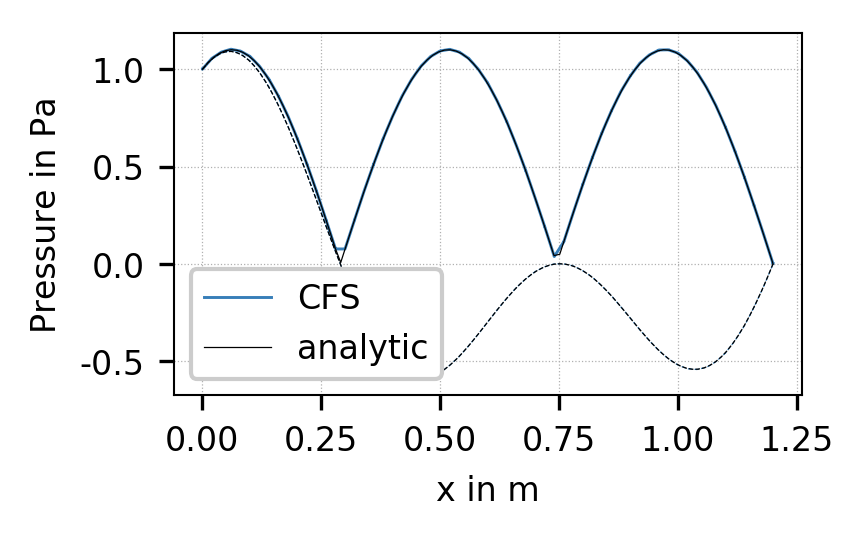

In [3]:
for M in [0,0.3,0.5]:

    h5 = 'results_hdf5/test_M%.1f.cfs'%M
    X = get_coordinates(h5)
    V = get_result(h5,'fluidMechVelocity',step='all')
    P = get_result(h5,'fluidMechPressure',step='all')
    f = get_step_values(h5)[0]


    If = np.argwhere(np.abs(X[:,2])<1e-6).ravel()
    If = If[np.argsort(X[If,0])]

    fig,ax = plt.subplots()
    l, = ax.plot(X[If,0],np.abs(P[If]),'-',label='CFS')
    ax.plot(X[If,0],P[If].real,color=l.get_color(),lw=0.3,ls='--')


    x = np.linspace(X[If[0],0],X[If[-1],0],100)
    c = 1
    k0 = 2*pi*f[0]/c
    #M = 0.3
    L = x[-1]

    k1 = k0/(1+M)
    k2 = -k0/(1-M)
    x1 = 0
    x2 = L
    A = np.array([[exp(1j*k1*x1),exp(1j*k2*x1) ], # at x = x1
                  [exp(1j*k1*x2),exp(1j*k2*x2) ] ])
    p1,p2 = np.linalg.solve(A,[1.0,0.0])

    sol = p1*exp(1j*k1*x)+p2*exp(1j*k2*x)
    l, = ax.plot(x,np.abs(sol),'k',lw=0.3,label='analytic')
    ax.plot(x,sol.real,'--',color=l.get_color(),lw=l.get_lw())
    ax.set_xlabel('x in m')
    ax.set_ylabel('Pressure in Pa')
    #ax.set_ylim(-0.8,2.1)
    ax.legend()

In [4]:
c = 1
k0 = 2*pi*1.0/c
L = 1.1
x = np.linspace(0,1,100)
x1 = x[0]
x2 = x[-1]
fig,ax=plt.subplots()
for M in [0.1,0.2,0.3,0.4,0.5,0.8]:
    k1 = k0/(1+M)
    k2 = -k0/(1-M)
    A = np.array([[exp(1j*k1*x1),exp(1j*k2*x1) ], # at x = x1
              [exp(1j*k1*x2),exp(1j*k2*x2) ] ])
    p1,p2 = np.linalg.solve(A,[1.0,0.0])

    sol = p1*exp(1j*k1*x)+p2*exp(1j*k2*x)
    l, = ax.plot(x,np.abs(sol))
    ax.plot(x,sol.real,'--',color=l.get_color(),lw=l.get_lw())